# Data Preparation section: RFM dataset fix

In [1]:
# load rfm dataframe
import pickle

# data wrangling
import numpy as np
import pandas as pd
import datetime as dt

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# normalization and scaler
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_rfm = pd.read_pickle('./data/rfm.pkl')

In [3]:
df_rfm.head(10)

,R (days),F,M (R$)
CustomerID,,,
12347,1,7,615.71
12348,74,4,449.31
12349,18,1,1757.55
12350,309,1,334.40
12352,35,8,313.25
12353,203,1,89.00
12354,231,1,1079.40
12355,213,1,459.40
12356,22,3,937.14


In [4]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 12347 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   R (days)  4335 non-null   int64 
 1   F         4335 non-null   int64 
 2   M (R$)    4335 non-null   object
dtypes: int64(2), object(1)
memory usage: 135.5+ KB


In [5]:
df_rfm.shape

(4335, 3)

### Correcting types and columns

In [6]:
df_rfm.reset_index(inplace=True)

In [7]:
df_rfm['M (R$)'] = df_rfm['M (R$)'].astype(float)

### Outliers filtering (removal)

<Axes: >

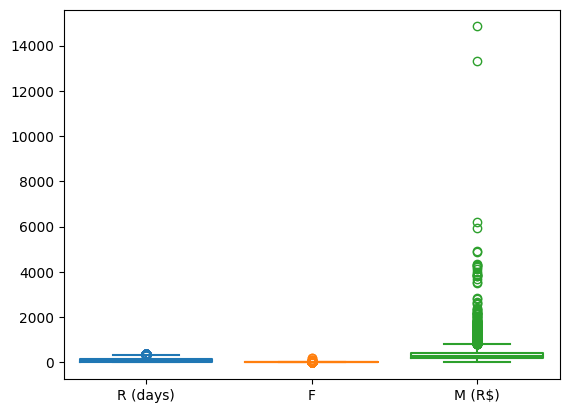

In [8]:
sns.boxplot(data = df_rfm[['R (days)', 'F', 'M (R$)']], fill = False)

Let's remove 5% of the outliers for Monetary.

<Axes: >

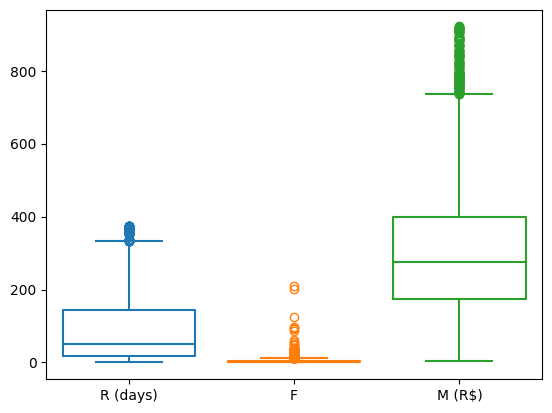

In [9]:
df_rfm = df_rfm[df_rfm['M (R$)'] < df_rfm['M (R$)'].quantile(.95)]

sns.boxplot(data = df_rfm[['R (days)', 'F', 'M (R$)']], fill = False)

And remove 1% for Frequency.

<Axes: >

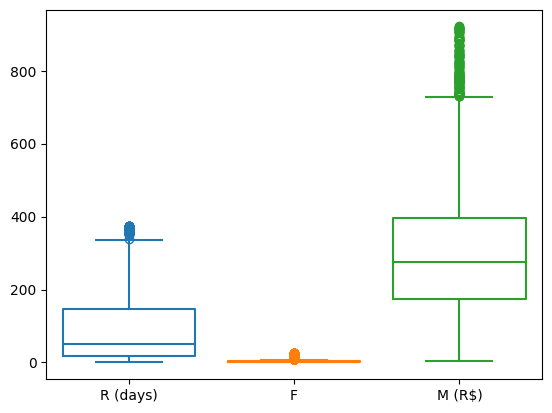

In [10]:
df_rfm = df_rfm[df_rfm['F'] < df_rfm['F'].quantile(.99)]
sns.boxplot(data = df_rfm[['R (days)', 'F', 'M (R$)']], fill = False)

### Visualizing the box plots scaled.

In [11]:
df_scaled = df_rfm.apply(scale)

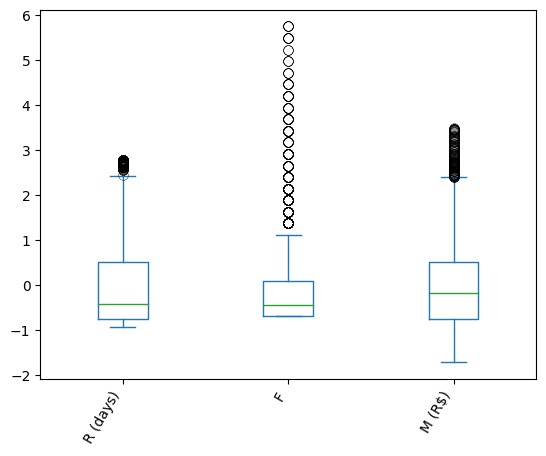

In [12]:
df_scaled[['R (days)', 'F', 'M (R$)']].plot.box(flierprops={'marker': 'o', 'markersize': 7, 'markeredgewidth': 0.3})
plt.xticks(rotation=60, ha='right')
plt.show()

Visualizing the data points.

In [13]:
from mpl_toolkits.mplot3d import Axes3D

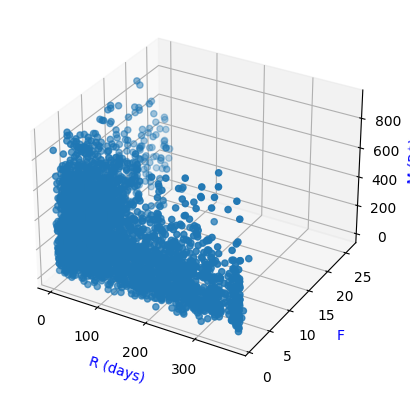

In [14]:
fig = plt.figure() 
ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.scatter(df_rfm['R (days)'], df_rfm['F'], df_rfm['M (R$)'])
ax.set_xlabel('R (days)', color = 'blue') 
ax.set_ylabel('F', color = 'blue') 
ax.set_zlabel('M (R$)', color = 'blue')
plt.show()

In [15]:
# responsive plot 
%matplotlib widget 

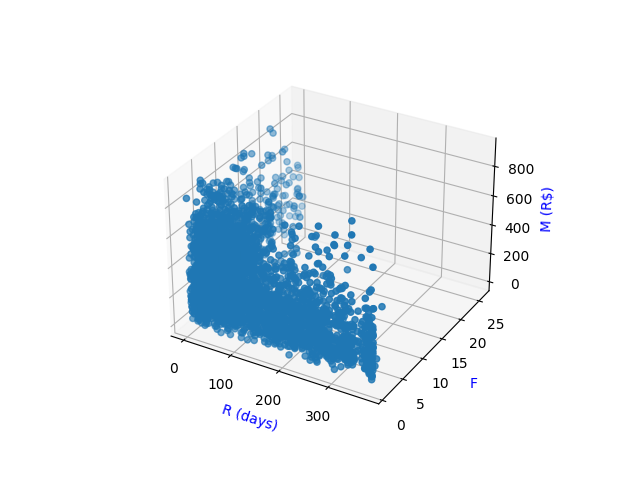

In [16]:
fig = plt.figure() 
ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.scatter(df_rfm['R (days)'], df_rfm['F'], df_rfm['M (R$)'])
ax.set_xlabel('R (days)', color = 'blue') 
ax.set_ylabel('F', color = 'blue') 
ax.set_zlabel('M (R$)', color = 'blue')
plt.show()

### Rescaling the Attributes

In [16]:
df_rfm.head()

,CustomerID,R (days),F,M (R$)
0,12347,1,7,615.71
1,12348,74,4,449.31
3,12350,309,1,334.40
4,12352,35,8,313.25
5,12353,203,1,89.00


In [17]:
df_rfm = df_rfm.reset_index().drop(columns = 'index')

In [18]:
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm.set_index('CustomerID')[['R (days)', 'F', 'M (R$)']])

In [19]:
df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.head()

,0,1,2
0,-0.914920,0.857420,1.757164
1,-0.188168,0.084642,0.813643
2,2.151378,-0.688136,0.162081
3,-0.576433,1.115013,0.042156
4,1.096094,-0.688136,-1.229385


In [20]:
df_rfm_scaled.shape[0] == df_rfm.shape[0]

True

In [21]:
df_rfm_scaled.describe()

,0,1,2
count,4.075000e+03,4.075000e+03,4.075000e+03
mean,-6.146413e-17,-6.451554e-17,-1.673917e-16
std,1.000123e+00,1.000123e+00,1.000123e+00
min,-9.248759e-01,-6.881360e-01,-1.717589e+00
25%,-7.556321e-01,-6.881360e-01,-7.532304e-01
50%,-4.171446e-01,-4.305433e-01,-1.731977e-01
75%,5.236515e-01,8.464212e-02,5.133497e-01
max,2.788531e+00,5.751682e+00,3.490316e+00


In [22]:
rfm_scaled = pd.merge(df_rfm, df_rfm_scaled, left_index=True, right_index=True).drop(columns = ['R (days)', 'F', 'M (R$)'])

In [23]:
rfm_scaled.head()

,CustomerID,0,1,2
0,12347,-0.914920,0.857420,1.757164
1,12348,-0.188168,0.084642,0.813643
2,12350,2.151378,-0.688136,0.162081
3,12352,-0.576433,1.115013,0.042156
4,12353,1.096094,-0.688136,-1.229385


In [24]:
rfm_scaled.to_pickle('./data/rfm_scaled.pkl')